<a href="https://colab.research.google.com/github/Vicks-2019/PYCARET1/blob/main/Pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Classification problem using pycaret
#pip install pycaret

In [20]:
import pandas as pd


In [21]:
from google.colab import files 
uploaded = files.upload()

Saving loan3.csv to loan3.csv


In [23]:
df = pd.read_csv('loan3.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,3510,38,12,61,91330,3,0.9,3,0,0,0,0,0,0
1,1129,30,5,171,94025,2,1.9,2,0,1,0,0,0,0
2,1637,65,39,100,92122,4,1.7,3,0,0,0,0,0,1
3,3165,28,4,82,95136,4,0.0,1,0,0,0,0,1,1
4,3563,32,8,169,94596,1,6.5,3,272,1,1,1,1,0


In [24]:
# import the classification module 
from pycaret import classification 


In [25]:
# setup the environment 
classification_setup = classification.setup(data= df, target='Personal Loan')

,Description,Value
0,session_id,2516
1,Target,Personal Loan
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(4000, 14)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [26]:

# build the decision tree model
classification_dt = classification.create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9750,0.9531,0.9259,0.8333,0.8772,0.8633,0.8648
1,0.9714,0.9015,0.8148,0.8800,0.8462,0.8304,0.8312
2,0.9857,0.9590,0.9259,0.9259,0.9259,0.9180,0.9180
3,0.9964,0.9980,1.0000,0.9643,0.9818,0.9798,0.9800
4,0.9857,0.9590,0.9259,0.9259,0.9259,0.9180,0.9180
5,0.9750,0.9365,0.8889,0.8571,0.8727,0.8589,0.8590
6,0.9857,0.9590,0.9259,0.9259,0.9259,0.9180,0.9180
7,0.9714,0.9180,0.8519,0.8519,0.8519,0.8360,0.8360
8,0.9786,0.9385,0.8889,0.8889,0.8889,0.8770,0.8770
9,0.9713,0.9180,0.8519,0.8519,0.8519,0.8360,0.8360


In [27]:
# build the xgboost model
classification_xgb = classification.create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9964,0.9997,0.9630,1.0000,0.9811,0.9792,0.9794
1,0.9786,0.9944,0.8148,0.9565,0.8800,0.8683,0.8717
2,0.9893,0.9990,0.9259,0.9615,0.9434,0.9375,0.9377
3,0.9964,0.9946,0.9630,1.0000,0.9811,0.9792,0.9794
4,0.9857,0.9990,0.9259,0.9259,0.9259,0.9180,0.9180
5,0.9893,0.9958,0.8889,1.0000,0.9412,0.9353,0.9373
6,0.9893,0.9984,0.9259,0.9615,0.9434,0.9375,0.9377
7,0.9679,0.9943,0.7778,0.8750,0.8235,0.8059,0.8076
8,0.9893,0.9980,0.9259,0.9615,0.9434,0.9375,0.9377
9,0.9892,0.9956,0.8889,1.0000,0.9412,0.9353,0.9372


In [30]:

# ensemble boosting
boosting = classification.ensemble_model(classification_dt, method= 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9857,0.9590,0.9259,0.9259,0.9259,0.9180,0.9180
1,0.9750,0.9200,0.8519,0.8846,0.8679,0.8541,0.8543
2,0.9857,0.9590,0.9259,0.9259,0.9259,0.9180,0.9180
3,0.9893,0.9775,0.9630,0.9286,0.9455,0.9395,0.9397
4,0.9893,0.9444,0.8889,1.0000,0.9412,0.9353,0.9373
5,0.9714,0.9346,0.8889,0.8276,0.8571,0.8413,0.8420
6,0.9893,0.9941,1.0000,0.9000,0.9474,0.9414,0.9430
7,0.9679,0.9160,0.8519,0.8214,0.8364,0.8185,0.8187
8,0.9750,0.9365,0.8889,0.8571,0.8727,0.8589,0.8590
9,0.9713,0.9015,0.8148,0.8800,0.8462,0.8304,0.8311


In [31]:

# Ensemble: blending
blender = classification.blend_models(estimator_list=[classification_dt, classification_xgb])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9750,0.9984,0.9259,0.8333,0.8772,0.8633,0.8648
1,0.9714,0.9944,0.8148,0.8800,0.8462,0.8304,0.8312
2,0.9857,0.9988,0.9259,0.9259,0.9259,0.9180,0.9180
3,0.9964,0.9999,1.0000,0.9643,0.9818,0.9798,0.9800
4,0.9857,0.9990,0.9259,0.9259,0.9259,0.9180,0.9180
5,0.9750,0.9952,0.8889,0.8571,0.8727,0.8589,0.8590
6,0.9857,0.9982,0.9259,0.9259,0.9259,0.9180,0.9180
7,0.9714,0.9940,0.8519,0.8519,0.8519,0.8360,0.8360
8,0.9786,0.9974,0.8889,0.8889,0.8889,0.8770,0.8770
9,0.9713,0.9935,0.8519,0.8519,0.8519,0.8360,0.8360


In [32]:
# compare performance of different classification models
classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9886,0.9969,0.9000,0.9805,0.9377,0.9314,0.9329,2.889
gbc,Gradient Boosting Classifier,0.9871,0.9969,0.9037,0.9621,0.9311,0.9240,0.9251,0.386
xgboost,Extreme Gradient Boosting,0.9871,0.9969,0.9000,0.9642,0.9304,0.9234,0.9244,0.309
rf,Random Forest Classifier,0.9868,0.9958,0.8741,0.9876,0.9260,0.9188,0.9217,0.769
lightgbm,Light Gradient Boosting Machine,0.9868,0.9965,0.8963,0.9652,0.9286,0.9213,0.9226,0.110
et,Extra Trees Classifier,0.9836,0.9896,0.8370,0.9920,0.9050,0.8961,0.9017,0.524
dt,Decision Tree Classifier,0.9796,0.9441,0.9000,0.8905,0.8948,0.8836,0.8838,0.023
ada,Ada Boost Classifier,0.9682,0.9787,0.7815,0.8777,0.8254,0.8080,0.8105,0.184
lda,Linear Discriminant Analysis,0.9461,0.9646,0.6185,0.7791,0.6875,0.6585,0.6649,0.027
ridge,Ridge Classifier,0.9371,0.0000,0.3704,0.9434,0.5228,0.4972,0.5635,0.023


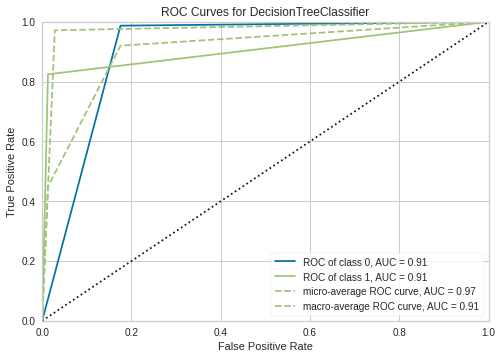

In [34]:
# AUC-ROC plot
classification.plot_model(classification_dt, plot = 'auc')



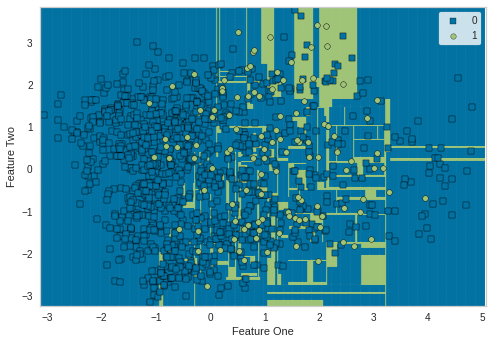

In [35]:
# Decision Boundary
classification.plot_model(classification_dt, plot = 'boundary')

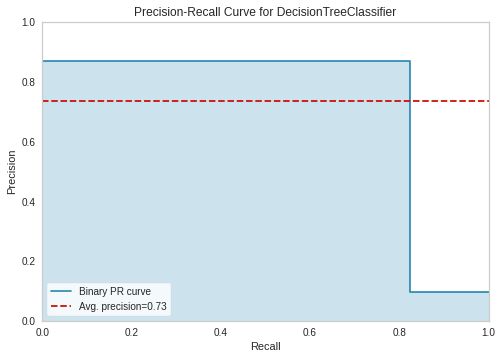

In [37]:

# Precision Recall Curve
classification.plot_model(classification_dt, plot = 'pr')



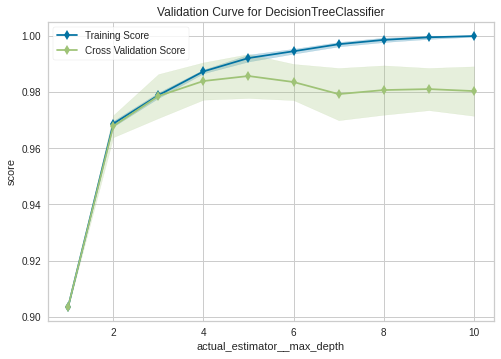

In [38]:
# Validation Curve
classification.plot_model(classification_dt, plot = 'vc')

In [39]:
# evaluate model
classification.evaluate_model(classification_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

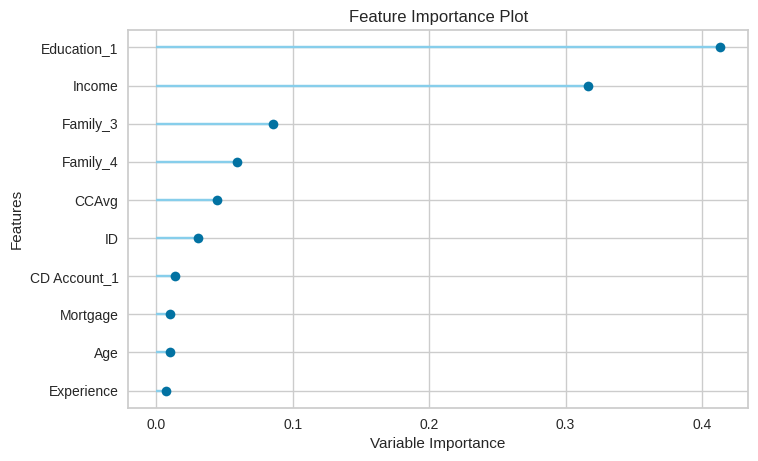

In [41]:
 #Dimension Learning
classification.plot_model(classification_dt, plot = 'feature')

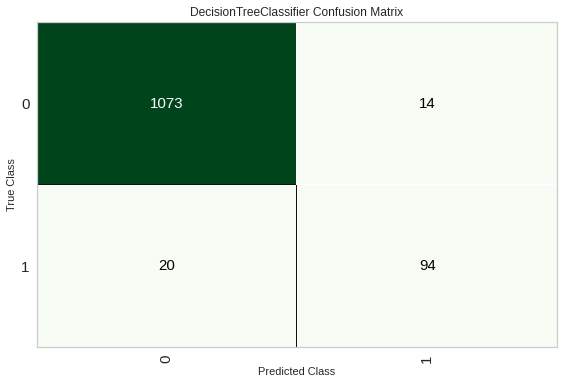

In [42]:
# Confusion Matrix
classification.plot_model(classification_dt, plot = 'confusion_matrix')

In [43]:

classification.evaluate_model(classification_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [46]:
from google.colab import files
uploaded1 = files.upload()

Saving loan4.csv to loan4.csv


In [47]:
test_df = pd.read_csv('loan4.csv')

In [49]:
predictions = classification.predict_model(classification_dt, data=test_df)

In [50]:
predictions

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Label,Score
0,118,58,33,61,92833,2,2.3,3,193,0,0,0,1,0,0,1.0
1,1817,45,19,91,92373,2,1.7,2,0,0,1,0,1,0,0,1.0
2,671,23,-1,61,92374,4,2.6,1,239,0,0,0,1,0,0,1.0
3,2994,65,40,20,92647,3,0.1,3,0,0,0,0,0,1,0,1.0
4,3265,67,41,114,95616,4,2.4,3,0,0,0,0,1,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4331,62,37,44,90401,1,1.1,3,0,0,0,0,0,0,0,1.0
996,3221,61,35,28,93302,2,0.2,3,135,0,0,0,1,0,0,1.0
997,1932,28,2,140,92122,2,2.0,1,0,0,0,0,1,0,0,1.0
998,4960,51,27,55,93014,1,1.6,2,197,0,1,0,1,0,0,1.0


In [51]:
classification.save_model(classification_dt, 'decision_tree_1')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='Personal Loan',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric...
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                         criterion='gini', 

In [53]:

dt_model = classification.load_model(model_name='decision_tree_1')

Transformation Pipeline and Model Successfully Loaded
